In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla

## Exercise on PCA: Eigenfaces for Facial Recognition


In [ ]:
from sklearn.datasets import fetch_lfw_people
min_faces_per_person = 30
faces = fetch_lfw_people(min_faces_per_person=min_faces_per_person)


1. We download the ‘Labelled Faces in the Wild’ (LFW) people dataset from sklearn. This dataset is a collection of pictures of famous people faces. We want only faces that are represented at least 30 times. Plot the first 10 faces (dataset.target images) together with the corresponding names (dataset.target names) using imshow. What are the dimensions of the images?

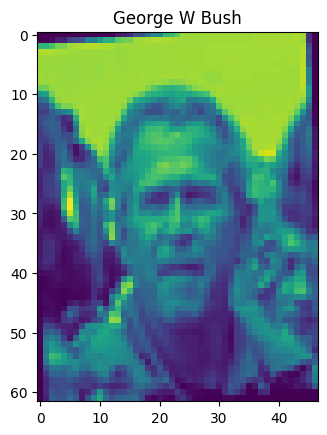

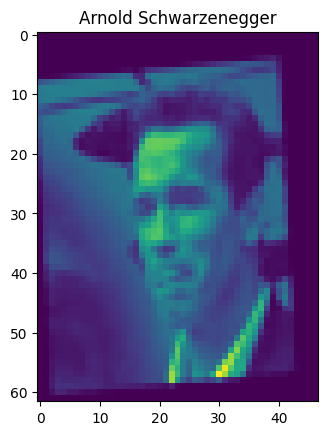

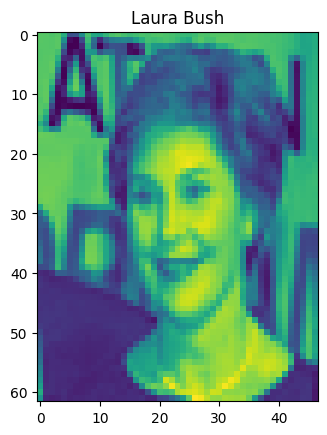

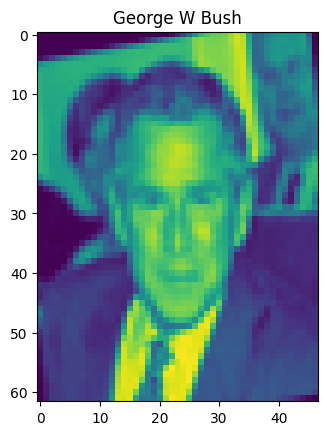

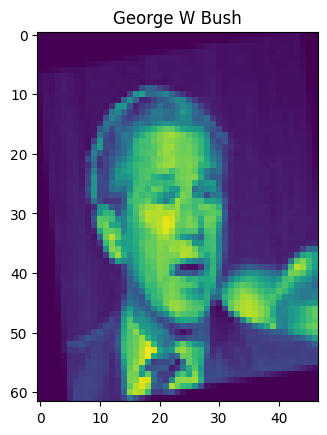

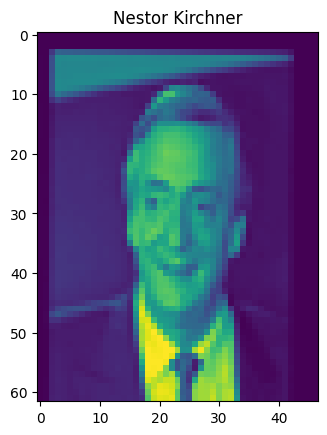

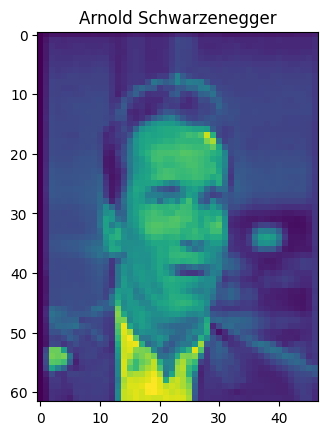

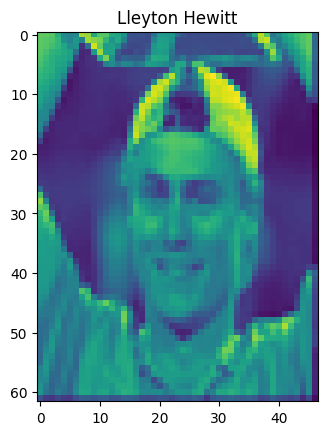

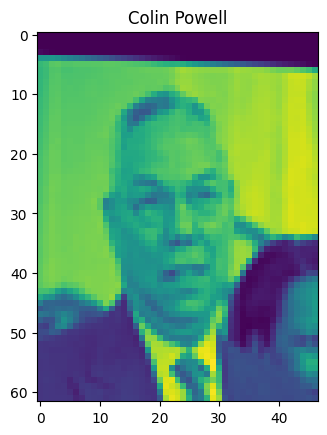

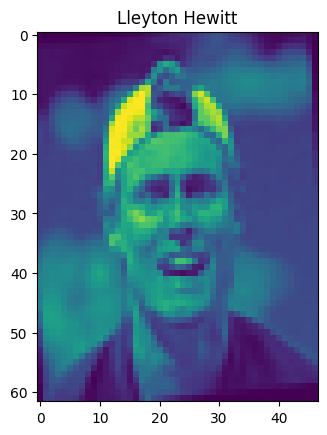

In [ ]:
# Print the first 10 faces with the corresponding names
for X, y in zip(faces.images[:10], faces.target[:10]):

    plt.title(faces.target_names[y])
    plt.imshow(X)
    plt.show()

In [ ]:
print(faces.images.shape, faces.target_names.shape)

(2370, 62, 47) (34,)


2. In order to obtain a balanced dataset, keep only 30 pictures per person. Then, normalize your data in the range from the range [0,255] to [0, 1].

In [ ]:
# Keep only 30 samples per each person

idx = np.zeros(faces.target.shape, dtype=bool)

for name in range(len(faces.target_names)):
    idx[np.where(faces.target == name)[0][:min_faces_per_person]] = 1 # mask

X = faces.data[idx] # all faces with at least 30 times occurences but only 30 times
y = faces.target[idx] # the results

# Normalize the data in [0,1]

X /= 255.

3. By using sklearn.decomposition.PCA compute the principal components and print their shape.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.

In [ ]:
# Do PCA on the dataset using sklearn

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X);

In [ ]:
pca.components_.shape

(1020, 2914)

4. Plot the first five principal components (the eigenfaces!), what do they look like?

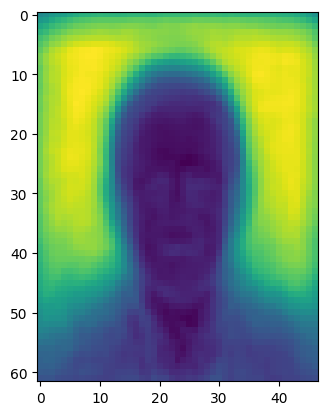

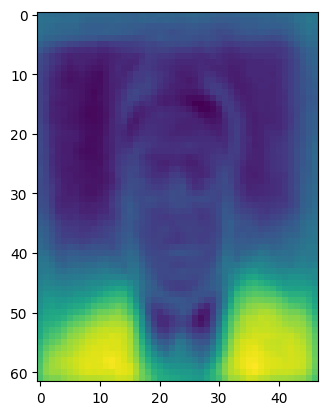

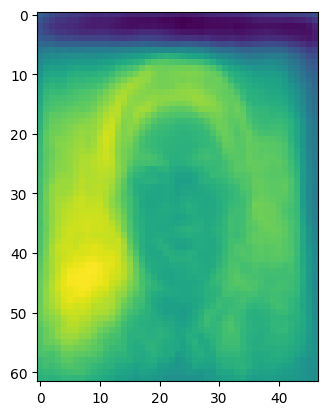

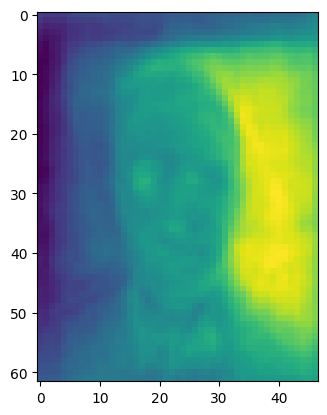

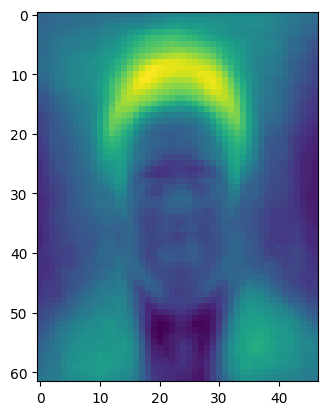

In [ ]:
# Plot the first 5 principal components
for i in range(5):
    plt.imshow(pca.components_[i].reshape(faces.images[0].shape))
    plt.show();

5. The proportion of the variance of each principal component (i.e. eigenvector of the covariance matrix) can be computed by dividing the corresponding eigenvalue by the trace of the covariance matrix. Plot the cumulative explained variance by using the attribute explained variance ratio . How many principal components do we need in order to explain the majority (e.g. 0.9) of the variance of our faces?


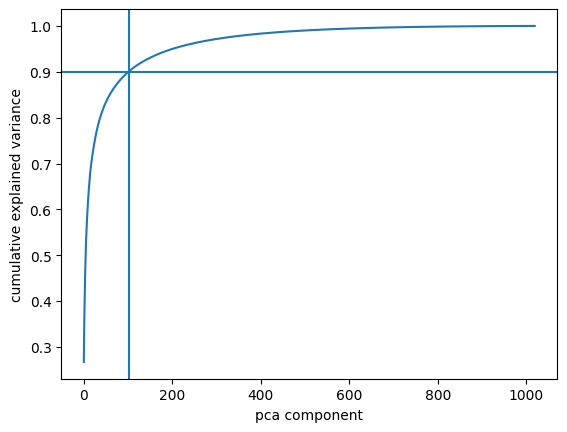

In [ ]:
# Plot the cumulative explained variance of the principal compoments

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("pca component")
plt.ylabel("cumulative explained variance")
plt.axhline(0.9)
plt.axvline(103)

6. Compute and plot the projections of four pictures on the first { 10, 30, 100, 300, 1000 } principal components. You can use the parameter n components and the method inverse transform from the sklearn PCA object. What do you observe? When do the faces become recognizable to you?

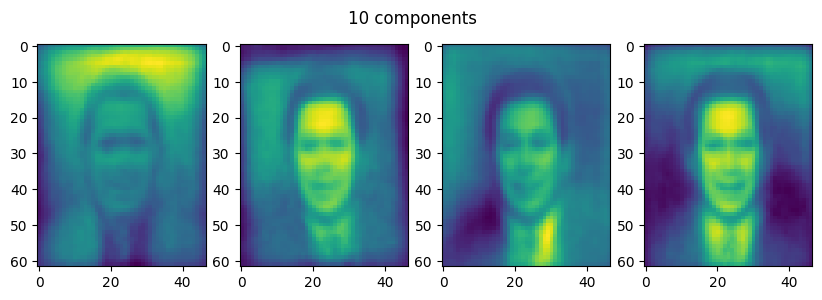

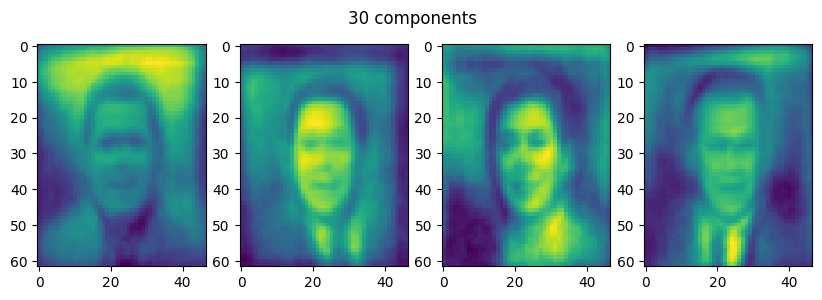

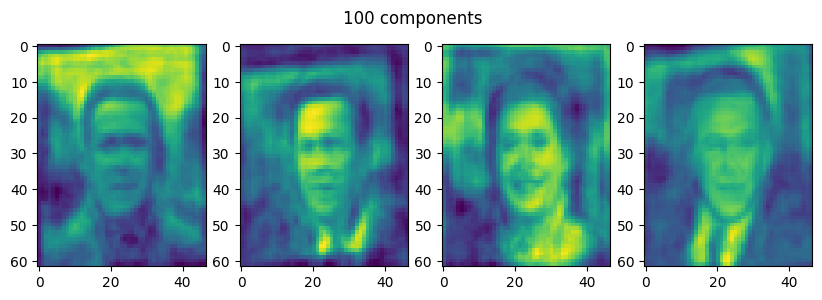

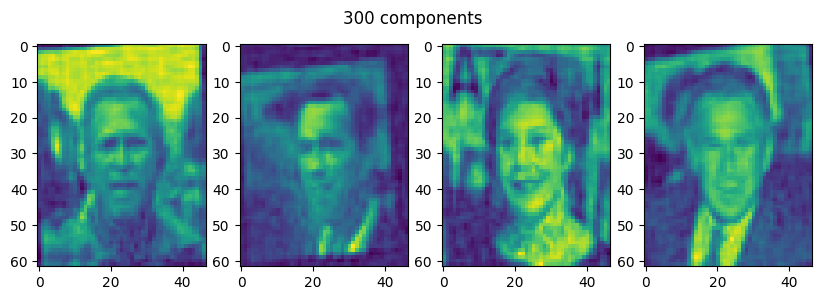

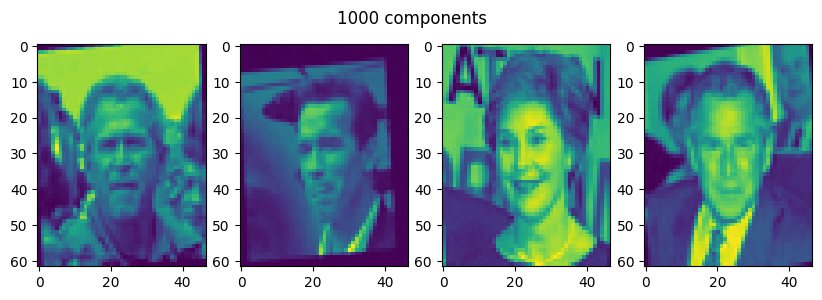

In [ ]:
# Plot the projections of 4 faces on the first {10, 30, 100, 300, 1000}
# principal component

components = [10, 30, 100, 300, 1000]

for comp in components:

    pca = PCA(n_components=comp)
    pca.fit(X)
    X_transf = pca.inverse_transform(pca.transform(X[:4]))

    fig, ax = plt.subplots(1, 4, figsize=(10,3))
    fig.suptitle(f'{comp} components')
    for i in range(4):
        ax[i].imshow(X_transf[i].reshape(faces.images[0].shape))
    plt.show()